# Introduction to Matplotlib

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[]

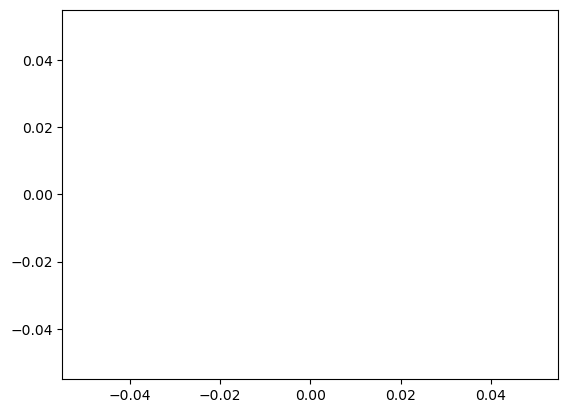

In [2]:
plt.plot()

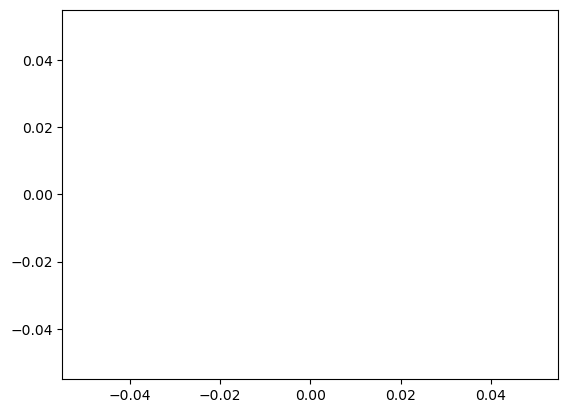

In [3]:
plt.plot();

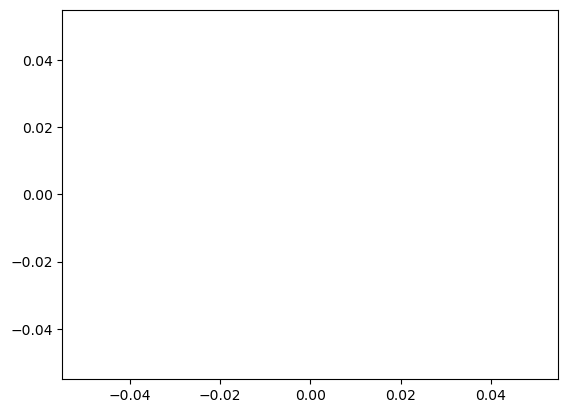

In [4]:
plt.plot()
plt.show()

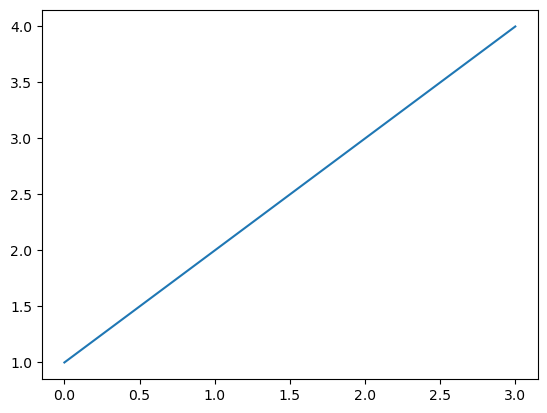

In [6]:
plt.plot([1, 2, 3, 4]);

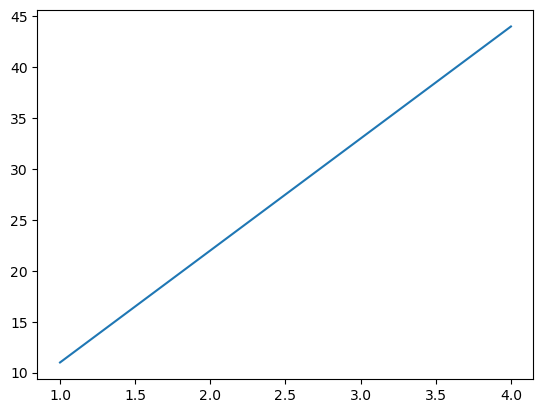

In [9]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y);

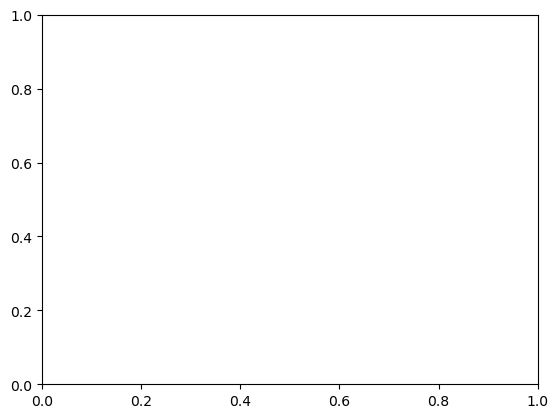

In [10]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # add some axes
plt.show()

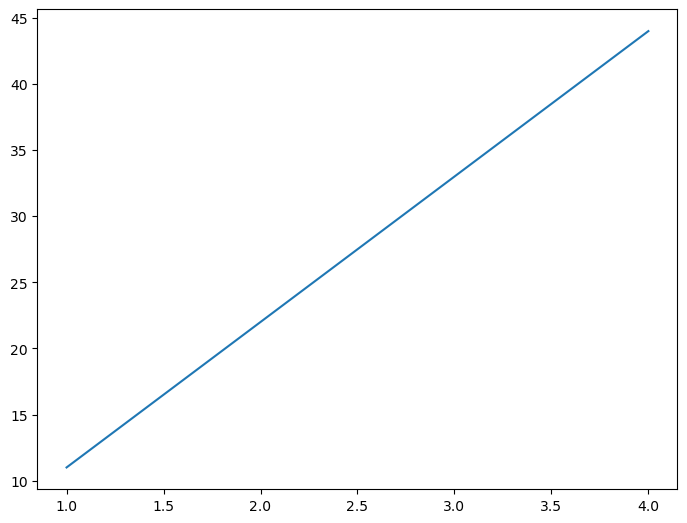

In [11]:
# 2nd method
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

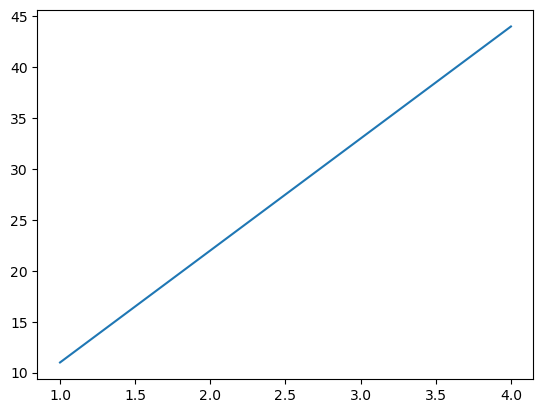

In [13]:
# 3rd methd (recommended)
fig, ax = plt.subplots()
ax.plot(x, y);
type(fig), type(ax)

## Matplotlib example workflow

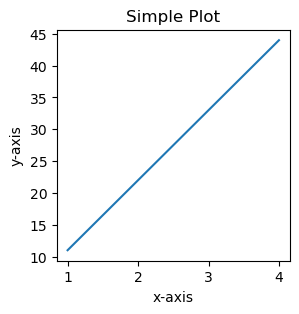

In [22]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(3, 3)) # (width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot", xlabel="x-axis", ylabel="y-axis") 

# 5. Save & show (save the whole figure)
fig.savefig("images/sample-plot.png")

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [23]:
import numpy as np

In [25]:
# create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

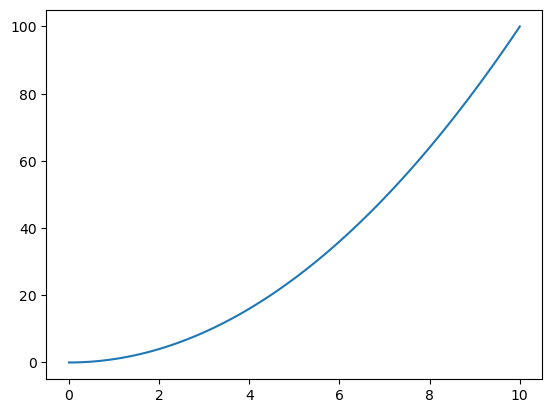

In [26]:
# plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x ** 2);

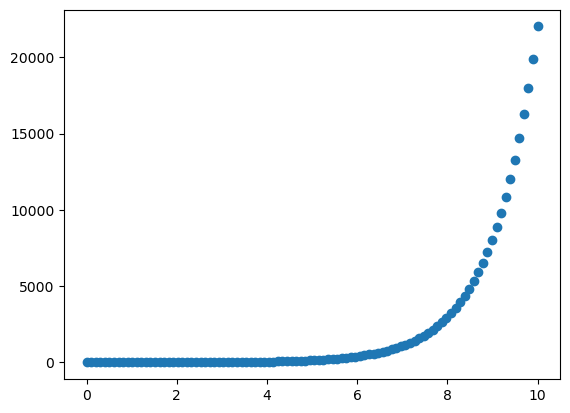

In [27]:
# use same data to make a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

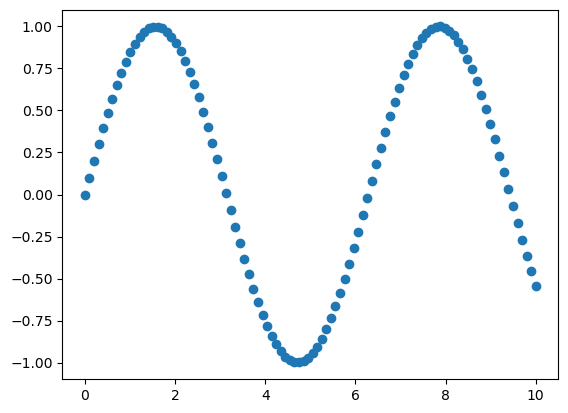

In [28]:
# another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

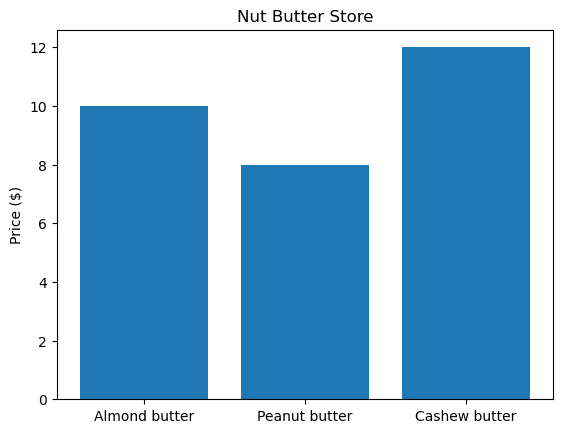

In [31]:
# make a bar plot from dictionary
nut_butter_prices = {
    "Almond butter": 10,
    "Peanut butter": 8,
    "Cashew butter": 12
}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Nut Butter Store", ylabel="Price ($)");

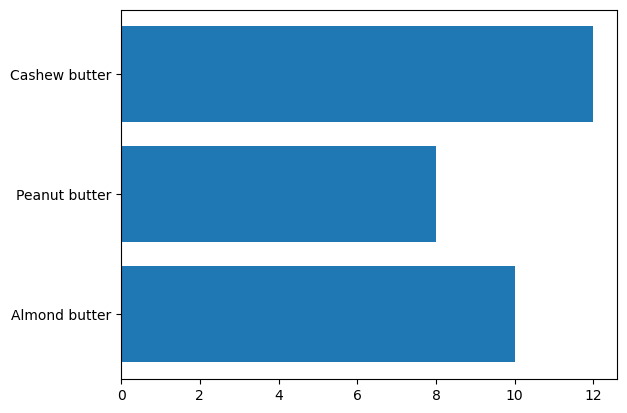

In [32]:
# horizontal bars
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

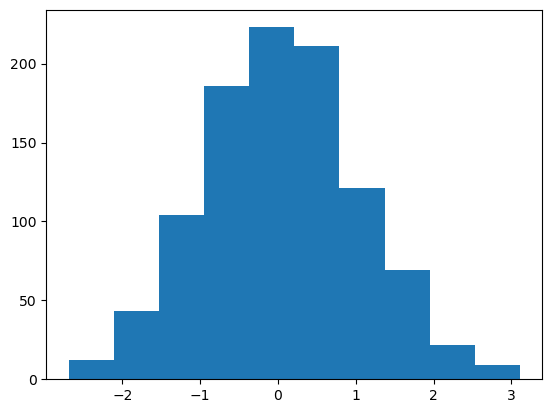

In [33]:
# histograms
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots

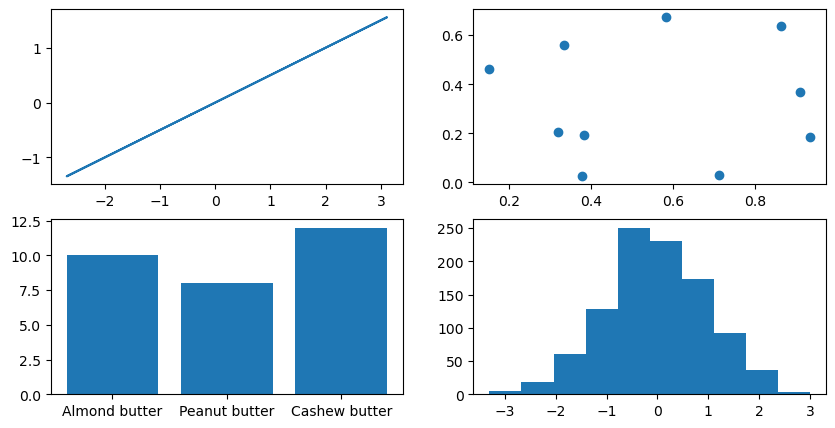

In [39]:
# subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
# Plot to each different axis
ax1.plot(x, x / 2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

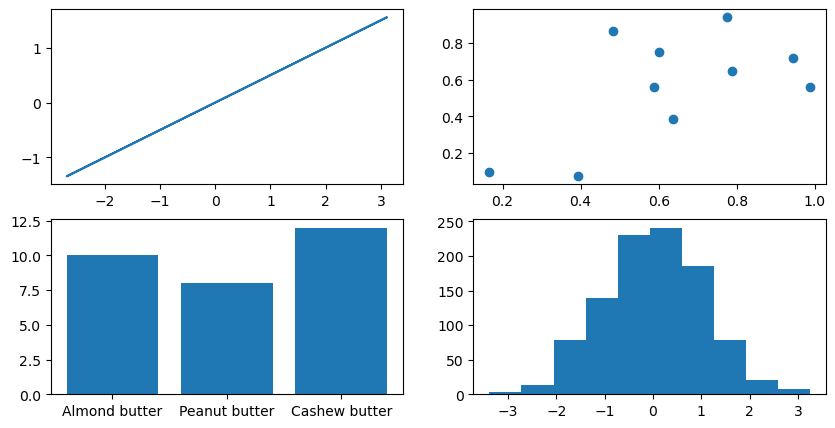

In [44]:
# subplot option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
# plot to each different index
ax[0, 0].plot(x, x / 2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas DataFrame

In [45]:
import pandas as pd

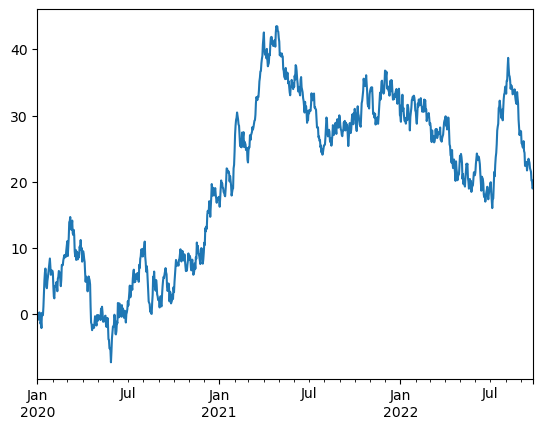

In [54]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot();

In [46]:
# Make a data frame
car_sales = pd.read_csv("data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [55]:
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "")
car_sales

C:\Users\k_appadurai\AppData\Local\Temp\1\ipykernel_19164\3073007673.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "")


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [56]:
# remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [57]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [59]:
type(car_sales["Price"][0])

str

In [60]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


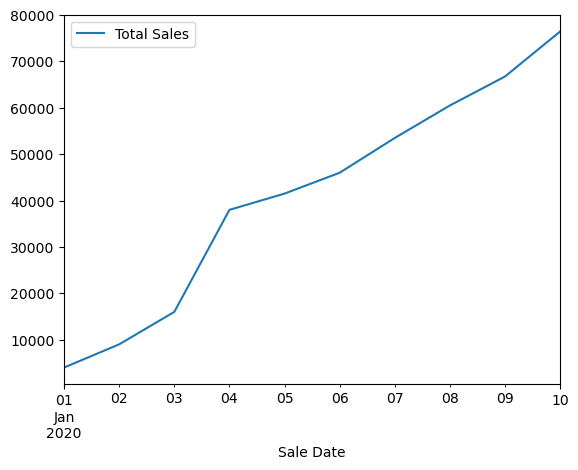

In [61]:
# plot total sales
car_sales.plot(x="Sale Date", y="Total Sales");

In [62]:
# convert price column to int
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


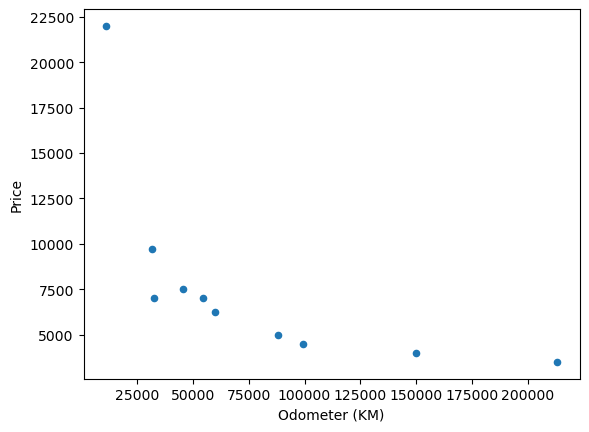

In [65]:
# scatter plot
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [66]:
# bar graph
x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=["a", "b", "c", "d"])
df

,a,b,c,d
0,0.438215,0.196759,0.312317,0.070374
1,0.531272,0.968584,0.595455,0.124780
2,0.049756,0.754291,0.268575,0.581151
3,0.718053,0.843088,0.465902,0.037298
4,0.179074,0.243341,0.636893,0.804315
5,0.723294,0.967583,0.761563,0.226235
6,0.142094,0.015970,0.385046,0.414798
7,0.155531,0.660507,0.733957,0.990107
8,0.476989,0.044066,0.736725,0.127817
9,0.553805,0.369389,0.727921,0.646091


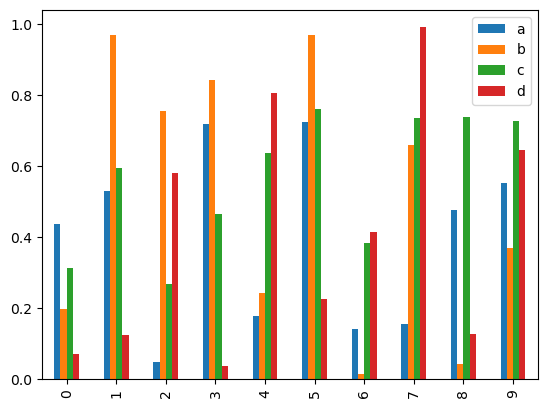

In [67]:
df.plot.bar();

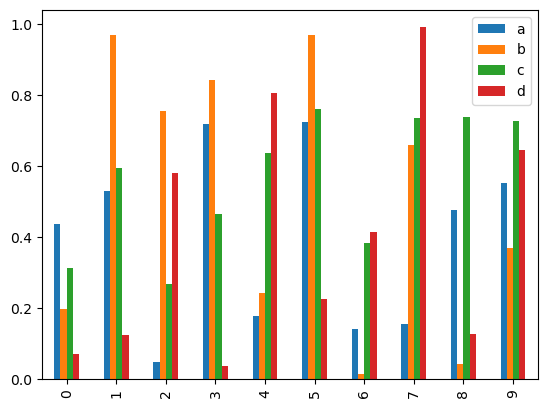

In [68]:
df.plot(kind="bar");

In [69]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


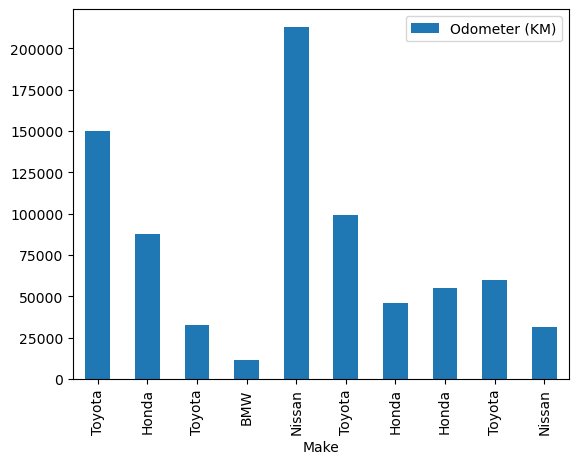

In [70]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

In [79]:
avg_car_sales = car_sales.groupby("Make", as_index=False)["Odometer (KM)"].mean();
avg_car_sales

,Make,Odometer (KM)
0,BMW,11179.000000
1,Honda,62778.333333
2,Nissan,122347.500000
3,Toyota,85451.250000


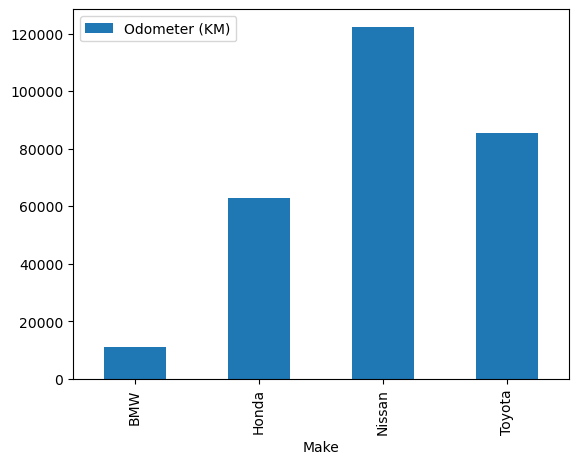

In [81]:
avg_car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

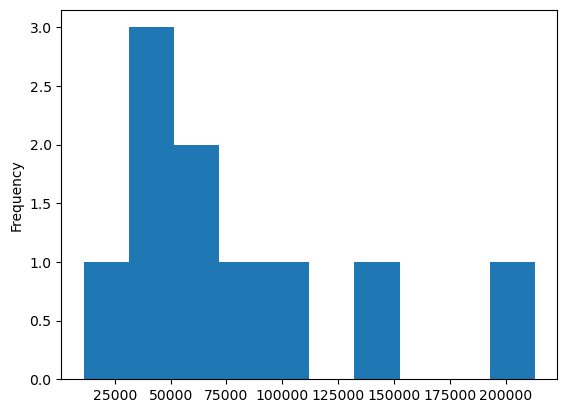

In [85]:
# Histograms
car_sales["Odometer (KM)"].plot.hist();

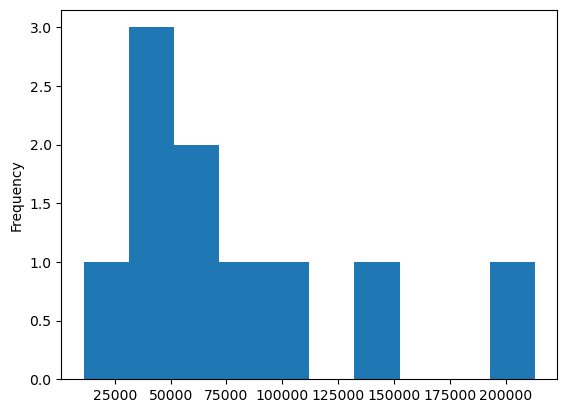

In [86]:
car_sales["Odometer (KM)"].plot(kind="hist");

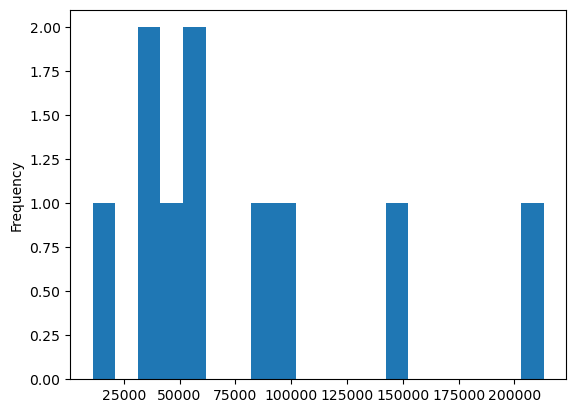

In [89]:
car_sales["Odometer (KM)"].plot(bins=20, kind="hist");

In [90]:
# Let's try another dataset
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


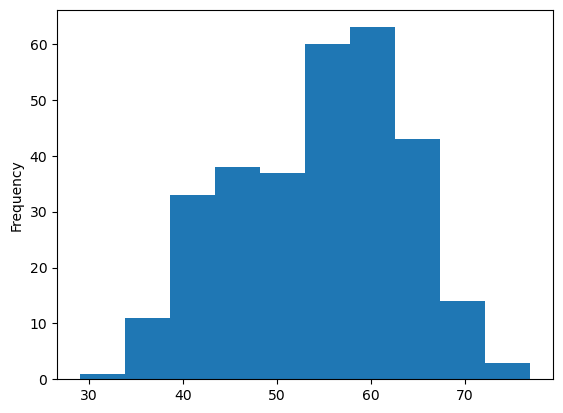

In [94]:
# Create a histogram of age to see the distribution
heart_disease["age"].plot.hist(bins=10);

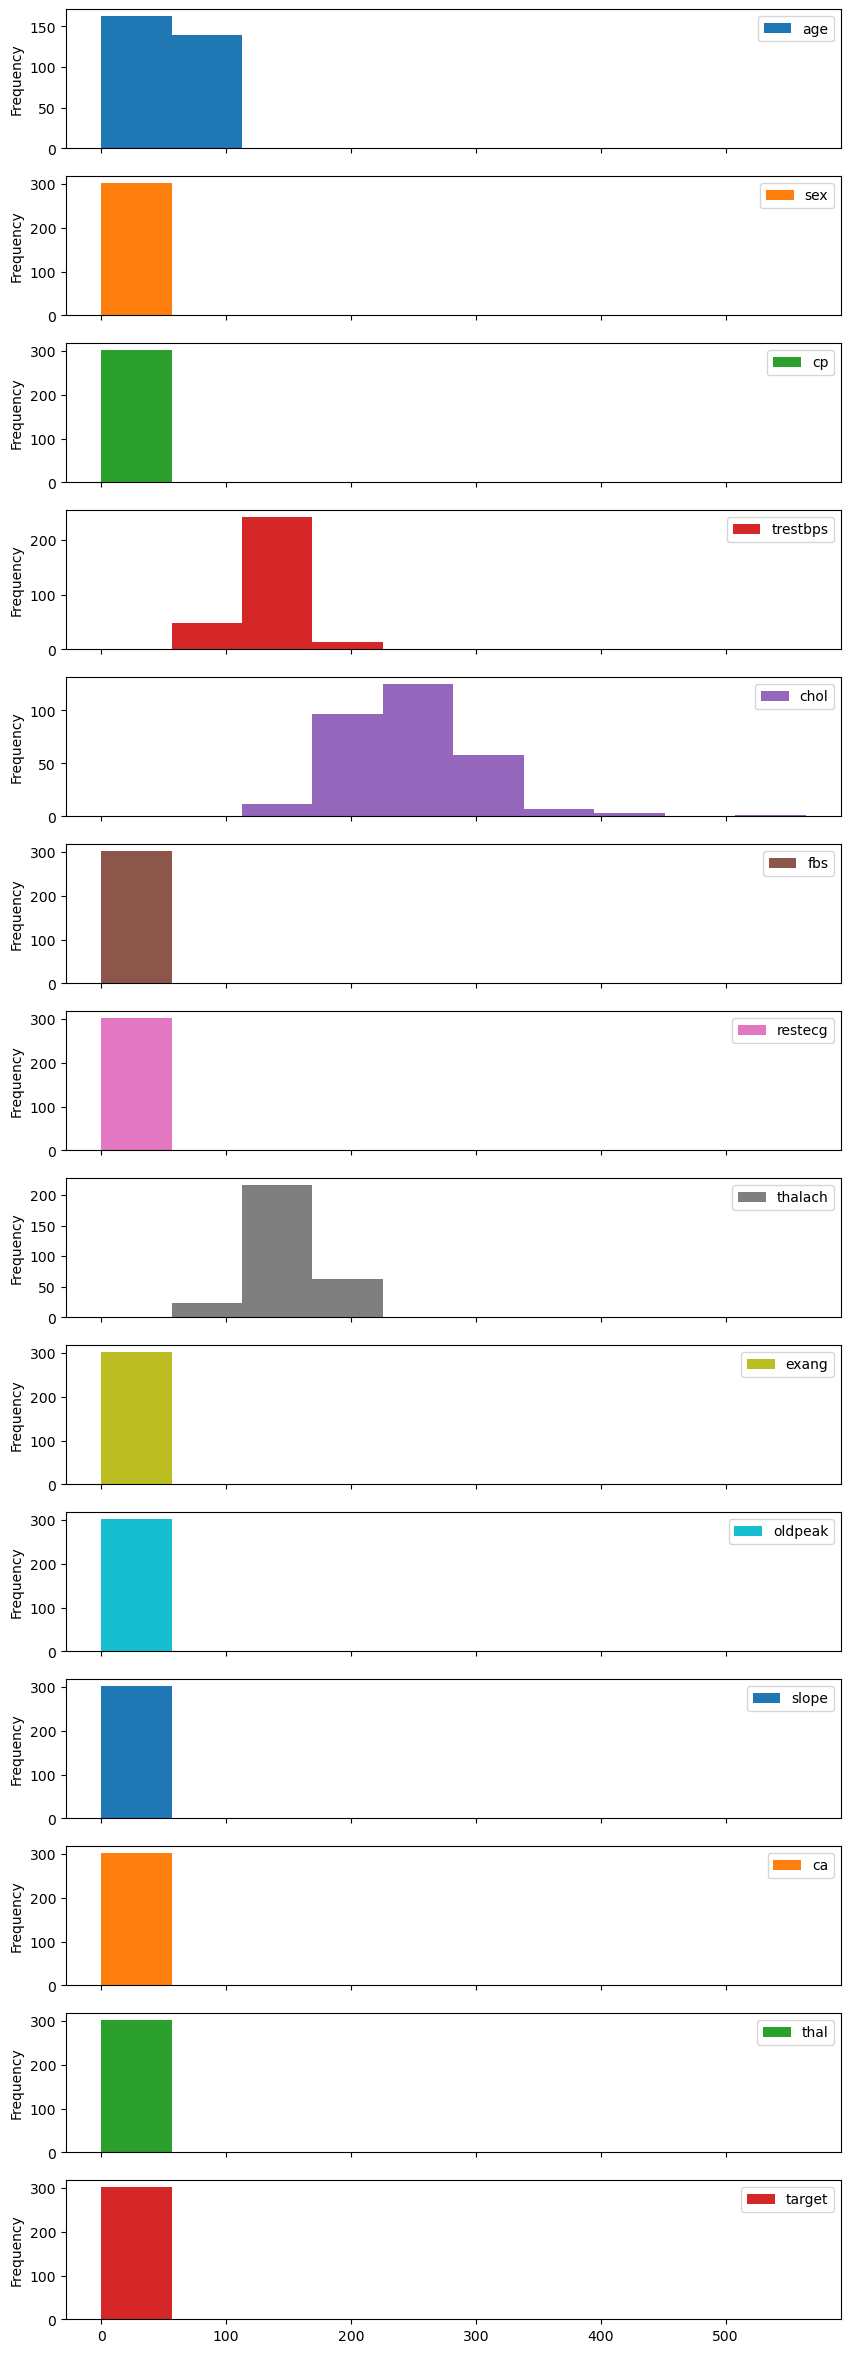

In [98]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

### Which one should you use? (pyplot vs matplotlib OO method)

* When plotting something quickly, okay to use pyplot method
* When plotting something more advanced, use matplotlib OO method

In [99]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [100]:
len(over_50)

208

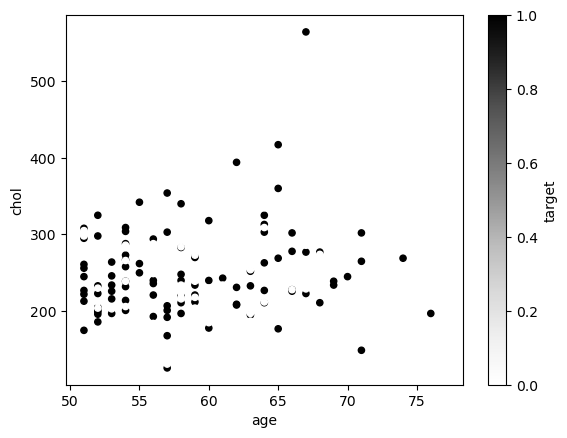

In [101]:
# pyplot method
over_50.plot(kind="scatter", x="age", y="chol", c="target");

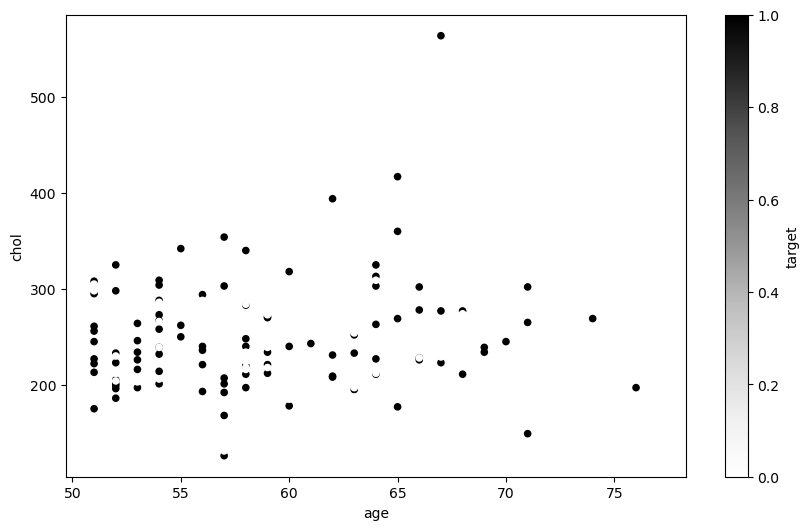

In [105]:
# OO method mixed with pyplot
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind="scatter", x="age", y="chol", c="target", ax=ax);
#ax.set_xlim([45, 100]);

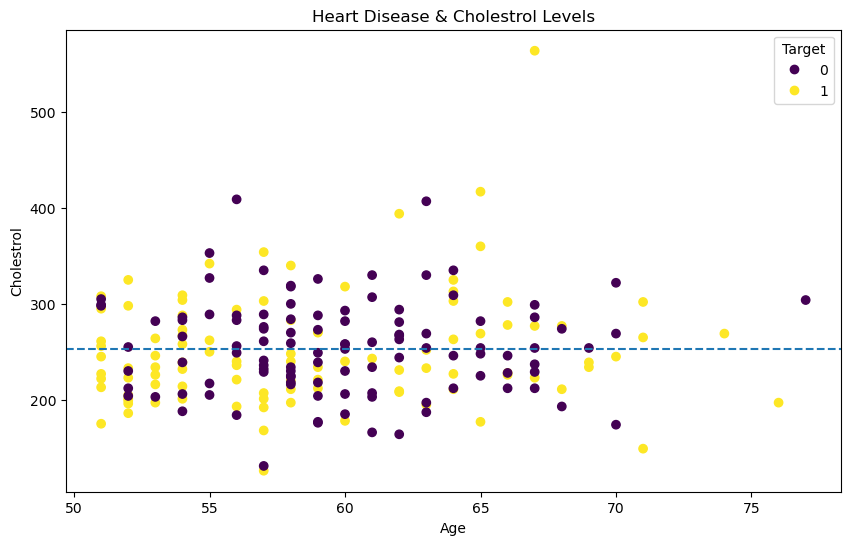

In [111]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"]);

# Customize the plot
ax.set(title="Heart Disease & Cholestrol Levels", xlabel="Age", ylabel="Cholestrol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(), linestyle="--");

In [112]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


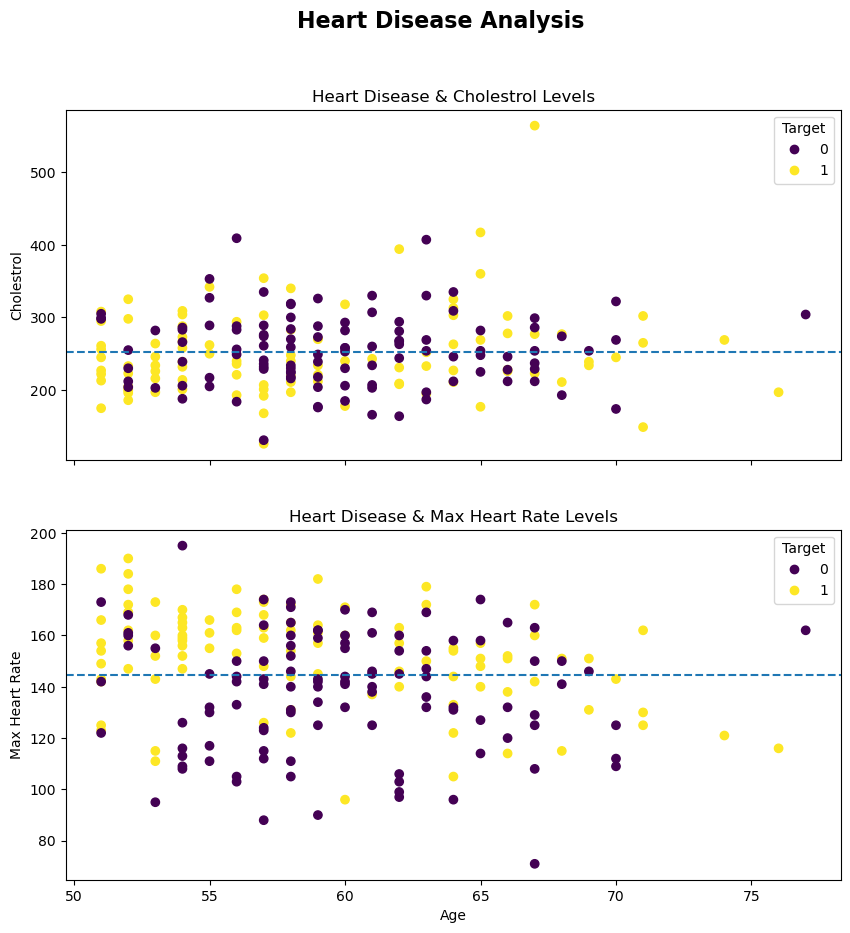

In [122]:
# Subplot of chol, age & thalach
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")

# Add data to ax0
scatter0 = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"]);
ax0.set(
    title="Heart Disease & Cholestrol Levels", 
    #xlabel="Age", 
    ylabel="Cholestrol");
ax0.legend(*scatter0.legend_elements(), title="Target");
ax0.axhline(over_50["chol"].mean(), linestyle="--");

# Add data to ax1
scatter1 = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"]);
ax1.set(title="Heart Disease & Max Heart Rate Levels", xlabel="Age", ylabel="Max Heart Rate");
ax1.legend(*scatter1.legend_elements(), title="Target");
ax1.axhline(over_50["thalach"].mean(), linestyle="--");

## Customizing matplotlib plots and getting stylish

In [123]:
# see the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

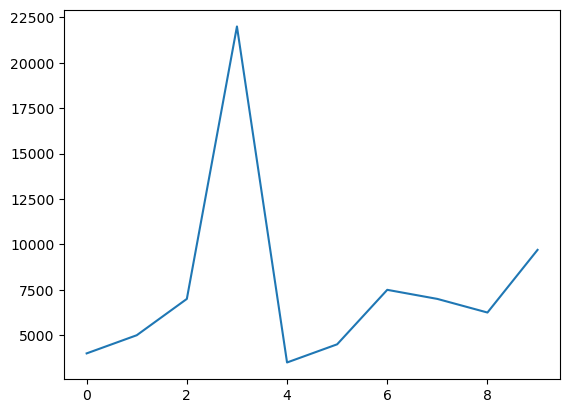

In [124]:
car_sales["Price"].plot();

In [128]:
plt.style.use("seaborn-v0_8-whitegrid")

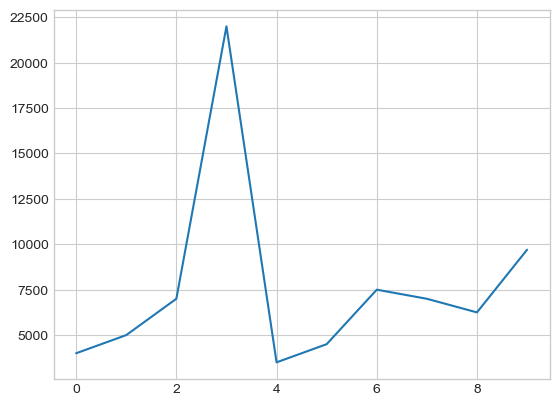

In [129]:
car_sales["Price"].plot();

In [130]:
plt.style.use("seaborn-v0_8")

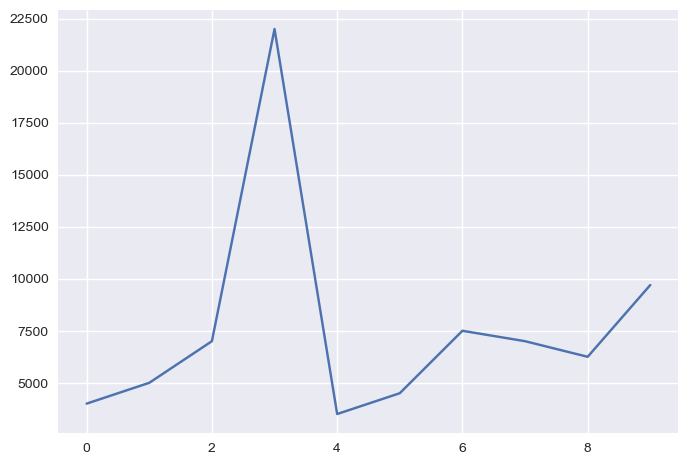

In [131]:
car_sales["Price"].plot();

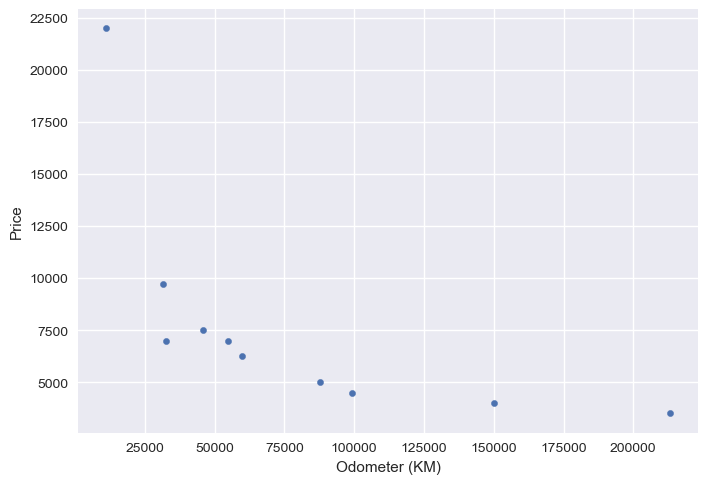

In [132]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [133]:
plt.style.use("ggplot")

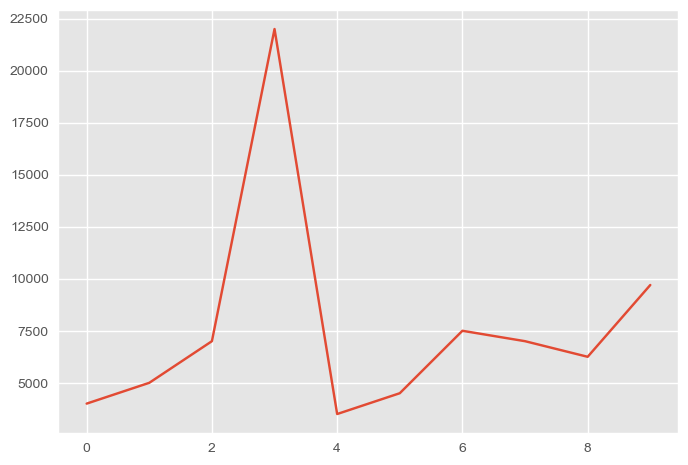

In [134]:
car_sales["Price"].plot();

In [135]:
# Create some data
x= np.random.randn(10, 4)
x

array([[ 0.54475241, -1.15206437,  0.82578048,  0.33093997],
       [ 1.73845204, -1.90163102,  0.62197654,  0.15113915],
       [ 2.22798409, -0.06214899,  0.60588184, -0.10817593],
       [ 0.66581365,  2.02174675, -1.60223556,  1.29209698],
       [ 0.20049995, -0.30274021,  1.51718075, -1.50046306],
       [-0.49428365,  0.46702962,  0.56438869, -1.08428558],
       [-0.06346195, -1.99278451, -1.10858423,  0.96949578],
       [-1.75383674,  1.16855878,  1.43407474, -0.17602324],
       [-2.1989987 , -0.80041445,  1.51998956,  0.21258991],
       [-0.17052016, -0.21008013, -0.26856172, -0.01637483]])

In [137]:
df = pd.DataFrame(x, columns=["a", "b", "c", "d"])
df

,a,b,c,d
0,0.544752,-1.152064,0.825780,0.330940
1,1.738452,-1.901631,0.621977,0.151139
2,2.227984,-0.062149,0.605882,-0.108176
3,0.665814,2.021747,-1.602236,1.292097
4,0.200500,-0.302740,1.517181,-1.500463
5,-0.494284,0.467030,0.564389,-1.084286
6,-0.063462,-1.992785,-1.108584,0.969496
7,-1.753837,1.168559,1.434075,-0.176023
8,-2.198999,-0.800414,1.519990,0.212590
9,-0.170520,-0.210080,-0.268562,-0.016375


matplotlib.axes._subplots.AxesSubplot

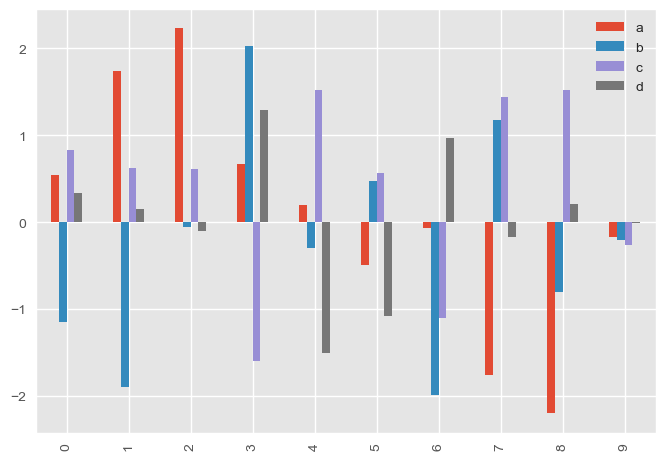

In [138]:
ax = df.plot(kind="bar")
type(ax)

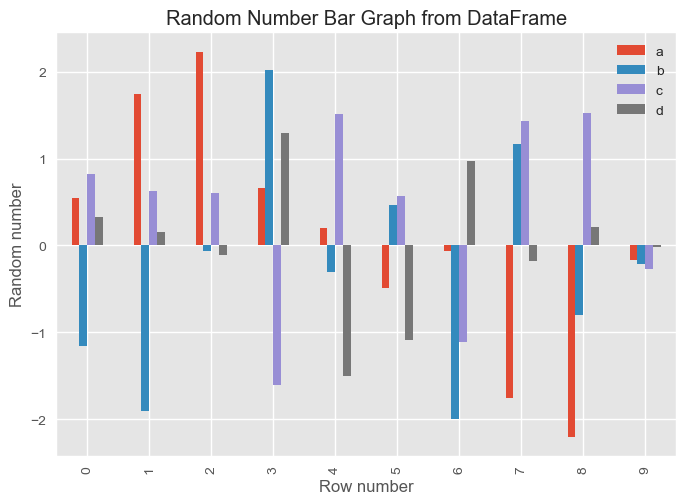

In [139]:
# Customize the plot with set() method
ax = df.plot(kind="bar")
# Add labels & title
ax.set(title="Random Number Bar Graph from DataFrame", xlabel="Row number", ylabel="Random number")
# Make legend visible
ax.legend().set_visible(True)

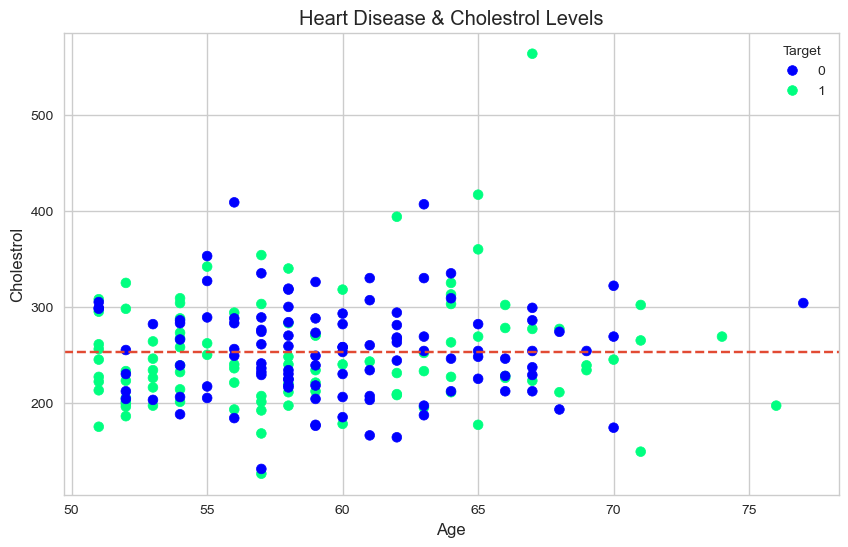

In [142]:
# Set the style
plt.style.use("seaborn-v0_8-whitegrid")

# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(
    x=over_50["age"], 
    y=over_50["chol"], 
    c=over_50["target"], 
    cmap="winter" # this changes the color scheme
);

# Customize the plot
ax.set(title="Heart Disease & Cholestrol Levels", xlabel="Age", ylabel="Cholestrol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(), linestyle="--");

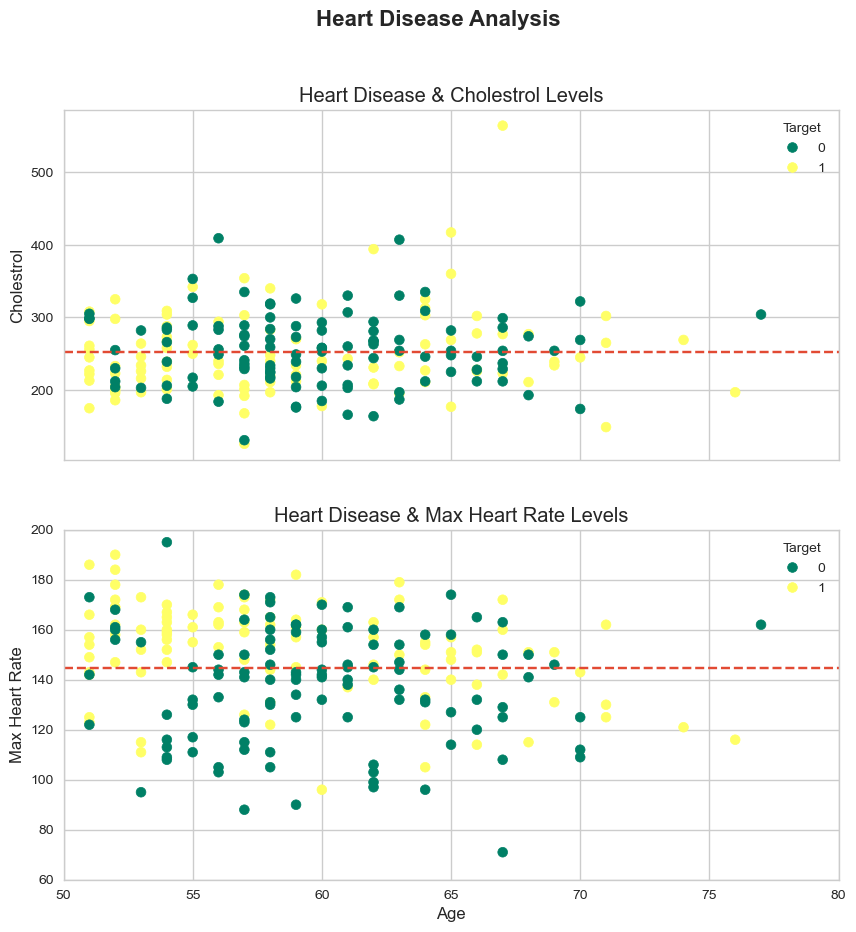

In [150]:
# Customizing x & y axis limitation


# Subplot of chol, age & thalach
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")

# Add data to ax0
scatter0 = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"], cmap="summer");
ax0.set(
    title="Heart Disease & Cholestrol Levels", 
    #xlabel="Age", 
    ylabel="Cholestrol");
# Change the axis limits
ax0.set_xlim([50, 80])
ax1.set_ylim([100, 600])
# Add a legend
ax0.legend(*scatter0.legend_elements(), title="Target");
# Add a mean line
ax0.axhline(over_50["chol"].mean(), linestyle="--");

# Add data to ax1
scatter1 = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"], cmap="summer");
ax1.set(title="Heart Disease & Max Heart Rate Levels", xlabel="Age", ylabel="Max Heart Rate");
# Change the axis limits
ax1.set_xlim([50, 80])
ax1.set_ylim([60, 200])
# Add a legend
ax1.legend(*scatter1.legend_elements(), title="Target");
# Add a mean line
ax1.axhline(over_50["thalach"].mean(), linestyle="--");

In [152]:
# Save the plot image
fig.savefig("heart-disease-analysis-plot.png")